In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from pyproj import Proj
import numpy as np
import cartopy
import pygrib

import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

import s3fs   # s3Fs is a Pythonic file interface to S3 (Amazon Simple Storage Service (Amazon S3))
import os

In [19]:
# The top-level class S3FileSystem holds connection information and allows typical file-system style- 
# operations like cp, mv, ls, du, glob, etc., as well as put/get of local files to/from S3.

fs = s3fs.S3FileSystem(anon=True)         # Use the anonymous credentials to access public data
files= fs.glob('noaa-goes16/ABI-L2-AODC/2021/140/01/*')
print(files)

['noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400101152_e20211400103525_c20211400105138.nc', 'noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400106152_e20211400108525_c20211400110132.nc', 'noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400111152_e20211400113525_c20211400115229.nc', 'noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400116152_e20211400118525_c20211400120190.nc', 'noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400121152_e20211400123525_c20211400125020.nc', 'noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400126152_e20211400128525_c20211400129501.nc', 'noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400131152_e20211400133525_c20211400134524.nc', 'noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400136152_e20211400138525_c20211400139460.nc', 'noaa-goes16/ABI-L2-AODC/2021/140/01/OR_ABI-L2-AODC-M6_G16_s20211400141152_e20211400143525_c20211400144

In [21]:
fs.get(files[0], "/home/prabu/Research/GOES_16_data/")      # Download 1st file to given path

[None]

In [22]:
# To open the data xarray with its recommended dependencies should be installed (conda install -c conda-forge h5netcdf)
ds_GOES = xr.open_dataset("/home/prabu/Research/GOES_16_data/OR_ABI-L2-AODC-M6_G16_s20211400101152_e20211400103525_c20211400105138.nc")

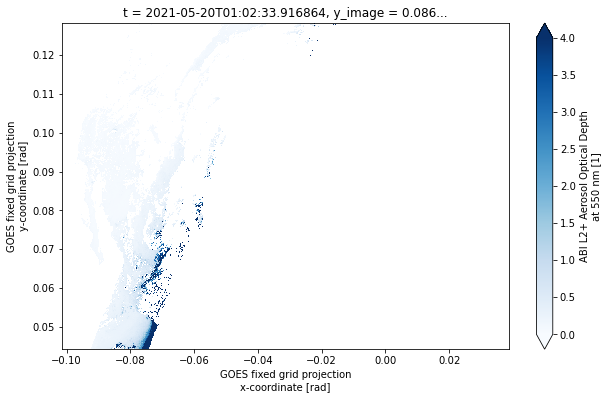

In [23]:
fig=plt.figure(figsize=[10,6])
ds_GOES.AOD.plot(cmap = "Blues", vmin=0, vmax=4)

In [29]:
# Reproject the AOD data
sat_sweep =  ds_GOES.variables['goes_imager_projection'].attrs["sweep_angle_axis"]
sat_h = ds_GOES.variables['goes_imager_projection'].attrs["perspective_point_height"]
pro = Proj("+proj=geos +lon_0=-75 +h=35786023 + x_0=0 +y_0=0 +ellps=GRS80 +units=m +no_defs=True") 

z = ds_GOES.AOD.data
xx_goes, yy_goes = np.meshgrid(ds_GOES.x.data*sat_h, ds_GOES.y.data*sat_h)
# Convert projected coordinates system to geographic coordinates system
lons, lats = pro(xx_goes, yy_goes, inverse=True)

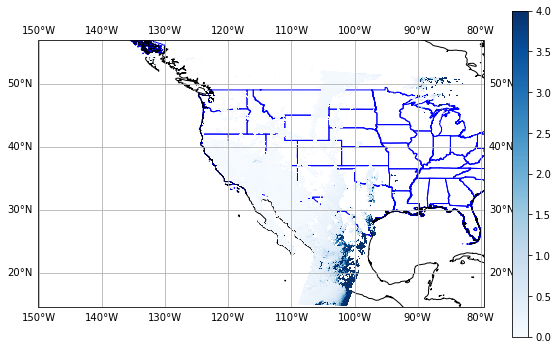

In [31]:
# Read US boundary shapefile
# USA states map was downloaded from https://www.weather.gov/gis/USStates
fname = '/home/prabu/Research/US_state_map/s_11au16.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), facecolor='none')
# Plot the AOD in PateCarree projection
fig=plt.figure(figsize=[10,6])
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.add_feature(shape_feature,edgecolor='blue')
ax.gridlines(draw_labels=True)
ax.coastlines()
c = ax.pcolor(lons,lats,z,cmap='Blues',vmin=0,vmax=4)
fig.colorbar(c, ax=ax)
#plt.savefig(os.path.join("/home/prabu/Research/gitHubRepos/Satellite_LoRa/firmware","GOES_AOD.png"))

In [14]:
# Plot Data Quality Flag
fig=plt.figure(figsize=[10,6])
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.add_feature(shape_feature,edgecolor='blue')
ax.gridlines(draw_labels=True)
ax.coastlines()
c = ax.pcolor(lons,lats,ds_GOES.DQF.data,cmap='tab20c')
# fig.colorbar(c, ax=ax)

IllegalArgumentException: Points of LinearRing do not form a closed linestring


ValueError: GEOSGeom_createLinearRing_r returned a NULL pointer

IllegalArgumentException: Points of LinearRing do not form a closed linestring


ValueError: GEOSGeom_createLinearRing_r returned a NULL pointer

<Figure size 720x432 with 1 Axes>

In [52]:
lons

array([[          inf,           inf,           inf, ...,  -53.18076931,
         -53.14563054,  -53.11047434],
       [          inf,           inf,           inf, ...,  -53.20210756,
         -53.16701224,  -53.13189956],
       [          inf,           inf,           inf, ...,  -53.22336616,
         -53.18831409,  -53.15324473],
       ...,
       [-113.05807757, -113.03074383, -113.00342604, ...,  -61.95837337,
         -61.9388586 ,  -61.91934134],
       [-113.0528647 , -113.02553718, -112.99822561, ...,  -61.95973528,
         -61.94022269,  -61.92070761],
       [-113.04766053, -113.02033921, -112.99303384, ...,  -61.9610951 ,
         -61.94158468,  -61.92207177]])

In [26]:
lats

array([[        inf,         inf,         inf, ..., 51.41351942,
        51.41569033, 51.4178655 ],
       [        inf,         inf,         inf, ..., 51.37517808,
        51.37734294, 51.37951203],
       [        inf,         inf,         inf, ..., 51.336889  ,
        51.33904783, 51.34121088],
       ...,
       [15.24048354, 15.2396299 , 15.23877723, ..., 14.68756118,
        14.68779331, 14.6880258 ],
       [15.22043572, 15.21958345, 15.21873215, ..., 14.66836539,
        14.66859717, 14.66882931],
       [15.20038998, 15.19953908, 15.19868915, ..., 14.64917105,
        14.64940249, 14.64963429]])